# Mutual Fund Creation

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
stocks = pd.read_excel("Stock Data.xlsx", sheet_name="Returns")
stocks.head()

,Date,HDFC Bank,Kotak Mahindra Bank,ICICI Bank,Bajaj Finance,Reliance,Avenue Supermarts,Housing Development Finance Corporation,Infosys,Asian Paints,...,Bandhan Bank,Bharti Airtel,Titan,Tech Mahindra,Larsen Toubro,Ultratech Cement,Divis Laboratories,Pidilite Industries,Astral Polytech,Eicher Motors
0,2019-12-31,-0.007066,-0.002192,-0.009560,-0.000649,-0.019492,-0.023818,-0.009867,-0.001433,-0.008627,...,0.007536,-0.010206,-0.005693,-0.025120,-0.002343,-0.001357,-0.001352,-0.014004,0.006675,-0.011330
1,2019-12-30,0.004667,0.001869,-0.009920,-0.003492,0.001329,-0.021360,-0.002864,-0.005429,-0.005819,...,-0.005424,0.011421,0.002728,0.002178,0.001808,-0.001085,0.010937,0.006223,0.007544,0.023918
2,2019-12-27,0.002635,-0.005313,0.019295,0.015170,0.017283,0.002057,0.012509,0.010353,0.001574,...,0.012178,0.018227,-0.001174,0.012649,0.015947,-0.001071,0.005250,0.006334,0.008083,0.008391
3,2019-12-26,-0.013767,-0.010311,-0.003789,0.012275,-0.019406,0.007265,0.001286,-0.005455,0.003715,...,0.005520,-0.022302,-0.009510,-0.002330,-0.017209,-0.008908,0.000770,0.009263,0.009565,0.007718
4,2019-12-24,-0.009982,0.003930,-0.000739,-0.004941,-0.015945,-0.008065,-0.004603,-0.003533,-0.002241,...,-0.011313,0.005939,-0.003641,-0.004189,-0.007321,0.003428,0.006033,-0.000617,0.002551,-0.012958


In [3]:
returns = stocks.iloc[:,1:]
returns.head()

,HDFC Bank,Kotak Mahindra Bank,ICICI Bank,Bajaj Finance,Reliance,Avenue Supermarts,Housing Development Finance Corporation,Infosys,Asian Paints,Bajaj Finserv,...,Bandhan Bank,Bharti Airtel,Titan,Tech Mahindra,Larsen Toubro,Ultratech Cement,Divis Laboratories,Pidilite Industries,Astral Polytech,Eicher Motors
0,-0.007066,-0.002192,-0.009560,-0.000649,-0.019492,-0.023818,-0.009867,-0.001433,-0.008627,-0.004754,...,0.007536,-0.010206,-0.005693,-0.025120,-0.002343,-0.001357,-0.001352,-0.014004,0.006675,-0.011330
1,0.004667,0.001869,-0.009920,-0.003492,0.001329,-0.021360,-0.002864,-0.005429,-0.005819,-0.001366,...,-0.005424,0.011421,0.002728,0.002178,0.001808,-0.001085,0.010937,0.006223,0.007544,0.023918
2,0.002635,-0.005313,0.019295,0.015170,0.017283,0.002057,0.012509,0.010353,0.001574,0.010137,...,0.012178,0.018227,-0.001174,0.012649,0.015947,-0.001071,0.005250,0.006334,0.008083,0.008391
3,-0.013767,-0.010311,-0.003789,0.012275,-0.019406,0.007265,0.001286,-0.005455,0.003715,0.005851,...,0.005520,-0.022302,-0.009510,-0.002330,-0.017209,-0.008908,0.000770,0.009263,0.009565,0.007718
4,-0.009982,0.003930,-0.000739,-0.004941,-0.015945,-0.008065,-0.004603,-0.003533,-0.002241,0.000091,...,-0.011313,0.005939,-0.003641,-0.004189,-0.007321,0.003428,0.006033,-0.000617,0.002551,-0.012958


In [4]:
#Calculating average return
ave_return = returns.mean()
ave_return

HDFC Bank                                 -0.000792
Kotak Mahindra Bank                        0.000738
ICICI Bank                                 0.001999
Bajaj Finance                              0.001911
Reliance                                   0.001362
Avenue Supermarts                          0.000799
Housing Development Finance Corporation    0.000759
Infosys                                   -0.000939
Asian Paints                               0.001054
Bajaj Finserv                              0.001494
TCS                                        0.000538
Nestle India                               0.001231
HUL                                        0.000515
Maruti Suzuki                             -0.000309
Bandhan Bank                               0.000368
Bharti Airtel                              0.000766
Titan                                      0.000991
Tech Mahindra                              0.000538
Larsen Toubro                              0.000174
Ultratech Ce

In [5]:
#Calculates the risk matrix
var_covar = returns.cov()
var_covar
n = len(returns.columns)

In [6]:
from quadprog import solve_qp

In [7]:
#Making the constraint function (LHS of constraints)
cons1 = np.matrix([np.ones(n) ,ave_return])    
cons2 = np.eye(n)
C = np.concatenate([cons1,cons2],axis =0)
C = C.T
C.shape

(24, 26)

In [8]:
req_return = float(input("What is the daily rate of return required?")) #An example

What is the daily rate of return required?0.0003


In [9]:
req_return

0.0003

In [10]:
b1 = np.array([1,req_return])
b2 = [0]*n
b= np.concatenate([b1,b2],axis=0)
b

array([1.e+00, 3.e-04, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00])

In [11]:
#Model Solving
model = solve_qp(a=np.zeros(n),G=var_covar.values,C=C,b=b,meq=2)

In [12]:
model

(array([ 4.23715233e-02,  8.92662182e-02,  1.35075971e-17,  7.34437417e-18,
         5.37208001e-19,  3.55055205e-18,  1.02089512e-02,  6.52392698e-02,
        -4.95196796e-18,  9.39175209e-18,  2.18876292e-01,  0.00000000e+00,
         1.82555007e-01,  4.55844709e-02,  2.29959358e-18,  1.15109766e-02,
         1.32285788e-02,  1.06912425e-01,  1.42441555e-01,  1.02676426e-02,
        -4.38737628e-18, -8.69975486e-18,  3.73395290e-02,  2.41975608e-02]),
 3.64163253437568e-05,
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.]),
 array([13,  0]),
 array([7.93774839e-05, 2.18161106e-02, 0.00000000e+00, 0.00000000e+00,
        2.89482302e-05, 4.67876523e-05, 4.58389246e-06, 1.03638030e-05,
        0.00000000e+00, 0.00000000e+00, 5.12711138e-06, 3.04379488e-05,
        0.00000000e+00, 1.74568758e-06, 0.00000000e+00, 0.00000000e+00,
        1.05897986e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.0

In [13]:
ret_seq = np.linspace(min(ave_return),max(ave_return),num=50)
ret_seq

array([-9.39468483e-04, -8.79495221e-04, -8.19521959e-04, -7.59548697e-04,
       -6.99575435e-04, -6.39602173e-04, -5.79628911e-04, -5.19655649e-04,
       -4.59682388e-04, -3.99709126e-04, -3.39735864e-04, -2.79762602e-04,
       -2.19789340e-04, -1.59816078e-04, -9.98428161e-05, -3.98695542e-05,
        2.01037078e-05,  8.00769697e-05,  1.40050232e-04,  2.00023494e-04,
        2.59996755e-04,  3.19970017e-04,  3.79943279e-04,  4.39916541e-04,
        4.99889803e-04,  5.59863065e-04,  6.19836327e-04,  6.79809589e-04,
        7.39782851e-04,  7.99756113e-04,  8.59729375e-04,  9.19702636e-04,
        9.79675898e-04,  1.03964916e-03,  1.09962242e-03,  1.15959568e-03,
        1.21956895e-03,  1.27954221e-03,  1.33951547e-03,  1.39948873e-03,
        1.45946199e-03,  1.51943526e-03,  1.57940852e-03,  1.63938178e-03,
        1.69935504e-03,  1.75932830e-03,  1.81930157e-03,  1.87927483e-03,
        1.93924809e-03,  1.99922135e-03])

In [15]:
#Calculating risk free rate
sigma_seq = [] 
max_sr = 0
rf = (1.065)**(1/252)-1
rf

0.00024993122427763304

In [16]:
for i in range(0,len(ret_seq)):
    
    cons1 = np.matrix([np.ones(n) ,ave_return])
    cons2 = np.eye(n)
    C = np.concatenate([cons1,cons2],axis =0)
    cons3 = np.zeros((5,n))
    cons3[0][0]=-1     #Imposing restrictions on maximum weights on some stocks
    cons3[1][5]=-1
    cons3[2][14]=-1
    cons3[3][17]=-1
    cons3[4][23]=-1
    cons3 = cons3.reshape((5,-1))
    C = np.concatenate([C,cons3])
    C = C.T
    
    
    #Limiting exposure of HDFC Bank to less than 10%
    #Limiting exposure of Avenue Supermarts to less than 5%
    #Limiting exposure of Bandhan Bank to less than 2%
    #Limiting exposure of Tech Mahindra to less than 1.5%
    #Limiting exposure of Eicher Motors to less than 0.5%
    
    b1 = np.array([1,ret_seq[i]])
    b2 = [0]*n
    b= np.concatenate([b1,b2],axis=0)
    b= np.concatenate([b,[-0.10,-0.05,-0.02,-0.015,-0.005]],axis=0)
    model = solve_qp(a=np.zeros(n),G=var_covar.values,C=C,b=b,meq=2)
    sigma = np.sqrt(2*model[1])
    sigma_seq.append(sigma)
    
    
    sr = (ret_seq[i]-rf)/(sigma)
    
    if sr>max_sr:
        max_sr = sr
        weights_opt = model[0]

In [17]:
r_p = np.sqrt(np.dot(np.dot(weights_opt.T,var_covar),weights_opt))
ret_p = np.dot(ave_return,weights_opt)

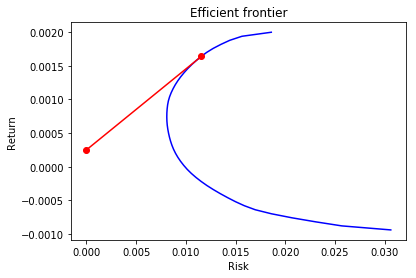

In [18]:
#Plotting
plt.plot(sigma_seq,ret_seq,color='blue')
plt.title('Efficient frontier')
plt.xlabel('Risk')
plt.ylabel('Return')

plt.plot([0,r_p],[rf,ret_p],color='red',marker='o')

In [19]:
#Optimum weights
weights_opt

array([-2.24915349e-17, -1.72546645e-18,  2.78665347e-01,  1.07582321e-01,
        1.42274886e-01, -8.69908642e-18, -1.16572242e-17, -6.39425133e-18,
        0.00000000e+00,  3.77631675e-17,  2.80759679e-02,  2.07271687e-01,
        1.15998585e-16,  1.15816389e-16, -2.21502697e-17,  2.77458225e-17,
        8.21125895e-19, -3.17130401e-18, -8.89884646e-17, -1.09306953e-16,
        2.36129792e-01, -6.42809553e-17,  9.30763141e-19, -6.84351493e-17])

In [20]:
#Optimum portfolio risk
r_p

0.011551595041886875

In [21]:
#Optimum Portfolio return
ret_p

0.0016393817794543419